In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import quad
au_to_m = 1.49e11
%matplotlib inline 

In [2]:
pc_to_m = 3.086e16

In [3]:
def L2F(L, radius):
    return L / ( 4. * np.pi * radius**2 )

In [4]:
# Flux function

def dnr_dF(Flux, *args):

    radius, alpha, F_min, F_max = args

#    F_min = L2F( L_min, radius )
#    F_max = L2F( L_max, radius )

    if (Flux < F_min):
        rslt = 0.
    elif(Flux <= F_max):
        rslt = Flux**(-1.*alpha) * radius**(4. - 2.*alpha)
    else: 
        rslt = 0.

    return rslt

In [8]:
# normalize a function

def make_normalizedfunc(func, llimit, ulimit, *args):
    
#    X_GRID = 200
#    X_grid = np.logspace(np.log10(llimit), np.log10(ulimit), X_GRID)
#    logX_grid = np.log(X_grid)
#    Y_grid = np.zeros(X_GRID)
#    for ii in xrange(X_GRID):
#        Y_grid[ii] = func(X_grid[ii], *args)

    # integral with log(X)
    norm = quad( func, llimit, ulimit, args=args )[0]
#    print "norm", norm

    def func_normalized(x, *args):
        return func(x, *args) / norm
    
    return func_normalized
    

In [5]:
# given probabilty function, compute the expected value for the maximum value

def expected_max( func_prob, llimit, ulimit, totalnum, *args ):
    
    X_GRID = 200
    X_grid = np.logspace( np.log10(llimit), np.log10(ulimit), X_GRID)
    logX_grid = np.log(X_grid)
    
    # probability for a target to have a value between X and X + dX
    P_grid = np.zeros(X_GRID)
    for ii in xrange(X_GRID):
        P_grid[ii] = func_prob( X_grid[ii], *args )
        
    # probability for a target to have a value less than X
    P_less_grid = np.zeros(X_GRID)
    for ii in xrange(1,X_GRID):
        P_less_grid[ii] = quad( func_prob, llimit, X_grid[ii], args=args )[0]
    
    # probability that maximum flux is X 
    totalprob_grid = totalnum * P_grid * P_less_grid**( totalnum - 1 )
    
    # expected value
    expected_value = np.trapz( X_grid * totalprob_grid * X_grid, x=logX_grid )
    
    return expected_value
                                                                

<function matplotlib.pyplot.show>

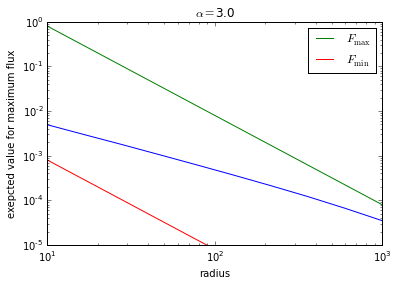

In [9]:
alpha = 3.0
L_min = 1.0
L_max = 1000.0
n_per_pc3 = 1e-2 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5, 1)
#plt.ylim(1e-2, 100)
plt.show

<function matplotlib.pyplot.show>

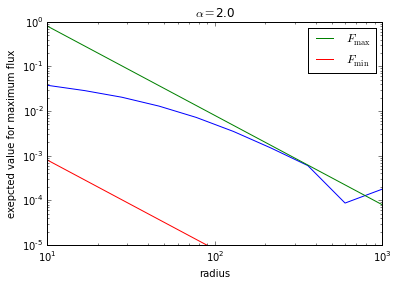

In [10]:
alpha = 2.0
L_min = 1.0
L_max = 1000.0
n_per_pc3 = 1e-2 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5, 1)
#plt.ylim(1e-2, 100)
plt.show

<function matplotlib.pyplot.show>

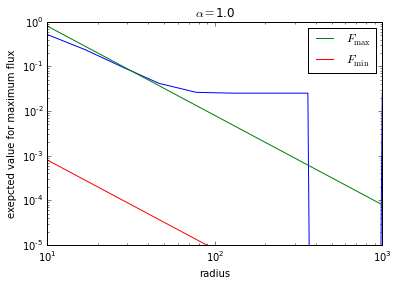

In [11]:
alpha = 1.0
L_min = 1.0
L_max = 1000.0
n_per_pc3 = 1e-2 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    totalnum = int(n_r)
    
    if (totalnum >= 1):
        F_min = L2F(L_min, radius)
        F_max = L2F(L_max, radius)
        args = ( radius, alpha, F_min, F_max )
    
        func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
        expected_value[nn] = expected_max( func_prob, F_min, F_max, totalnum, *args )
        Fmin[nn] =  L2F(L_min, radius)
        Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-5, 1)
#plt.ylim(1e-2, 100)
plt.show

n_r 0.125663706144
n_r 0.349666727046
n_r 0.972968438981
n_r 2.70734247794
n_r 7.53334126698
n_r 20.9619695725
n_r 58.3279255226
n_r 162.300917574
n_r 451.611944183
n_r 1256.63706144


<function matplotlib.pyplot.show>

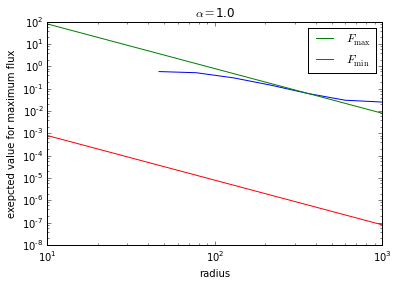

In [195]:
alpha = 1.0
L_min = 1.0
L_max = 100000.0
n_per_pc3 = 1e-4 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
    print "n_r", n_r
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = ( radius, alpha, F_min, F_max )
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    expected_value[nn] = expected_max( func_prob, F_min, F_max, n_r, *args )
    Fmin[nn] =  L2F(L_min, radius)
    Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-2, 100)
plt.show

<function matplotlib.pyplot.show>

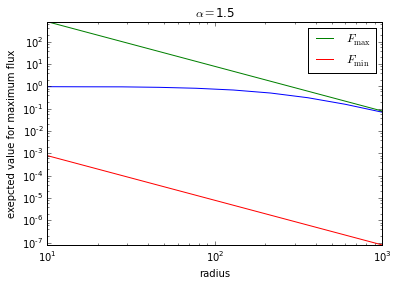

In [22]:
alpha = 1.5
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-3 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
#    print "n_r", n_r
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = ( radius, alpha, F_min, F_max )
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    expected_value[nn] = expected_max( func_prob, F_min, F_max, n_r, *args )
    Fmin[nn] =  L2F(L_min, radius)
    Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(Fmin[-1], Fmax[0])
plt.show

<function matplotlib.pyplot.show>

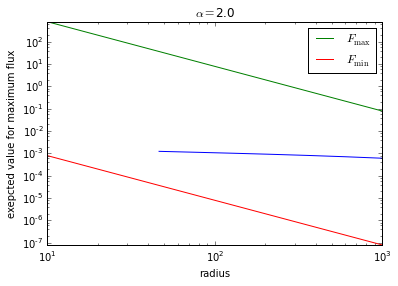

In [25]:
alpha = 2.0
L_min = 1.0
L_max = 1000000.0
n_per_pc3 = 1e-4 # /pc^3

N_GRID_R = 10
#R_grid = np.linspace(10, 300, N_GRID_R)
R_grid = np.logspace(1, 3, N_GRID_R)


Fmin = np.zeros(N_GRID_R)
Fmax = np.zeros(N_GRID_R)
expected_value = np.zeros(N_GRID_R)

##################################
for nn in xrange(N_GRID_R):

    radius = R_grid[nn]

    n_r = n_per_pc3 * ( 4. * np.pi * radius **2 )
#    print "n_r", n_r
    F_min = L2F(L_min, radius)
    F_max = L2F(L_max, radius)
    args = ( radius, alpha, F_min, F_max )
    
    func_prob = make_normalizedfunc(dnr_dF, F_min, F_max, *args)
    expected_value[nn] = expected_max( func_prob, F_min, F_max, n_r, *args )
    Fmin[nn] =  L2F(L_min, radius)
    Fmax[nn] =  L2F(L_max, radius)
##################################

plt.xlabel("radius")
plt.ylabel("exepcted value for maximum flux")
plt1 = plt.plot(R_grid, expected_value, label='')
plt2 = plt.plot(R_grid, Fmax, label=r'$F_{\rm max}$')
plt3 = plt.plot(R_grid, Fmin, label=r'$F_{\rm min}$')
plt.legend()
plt.title(r"$\alpha = $" + str(alpha))
plt.xscale("log")
plt.yscale("log")
plt.ylim(Fmin[-1], Fmax[0])
plt.show